# Project Report - Simulation of Epidemic Outbreak

## Introduction to model

Our model is a simulation based on the 'SIR' model in which a disease outbreak spreads through a sample population in a grid, returning an animation of the grid through time, a line graph, and various statistics from the simulation. Each element of the grid is an object of the class "Individual". This class has the attributes age, vaccination status, and infection status. Throughout the simulation people's infection status is either susceptible, infected, hospitalised, recovered or dead. A person's age is defined as either child 'C', young 'Y' , middle-aged 'M', or old 'O' and the vaccination status is either vaccinated "1" or non vaccinated "0". Intially the whole population is susceptible except the chosen number of initial infections. Each day, every susceptible person has a chance of getting infected depending on their age, vaccination status and the number of infected people they have been in contact with. Once infected, all individuals stay infected for a minimum of two days. Every day after this threshold, infected people have an age-dependant chance of recovering, being hospitalised or staying infected. This minimum number of days is to ensure a realistic outbreak, and that the infection progresses past just the first person or people in the original grid. Hospitalised individuals will recover, die or remain in hospital. We designed our code to have a main simulation, and then seperate **plot**, **grid** and **animation** files, which allow for flexibility in the representation of our data, as we can add new graphics by simply using outputs from our **simulation** file producing representations in a different file. <br><br>
**Notes**: We made some functions and copied some into the file called jupyter_display_do_not_mark.py because the argparse we used for the command line arguments interferred with using the functions directly from our main code. If this report is opened using jupyter, rerun each animation cell otherwise they will only show the last frame.

## Parameters

**-n**: Length of the side of the grid representing the population ($n^{2} = population$).<br>
**-inf_start**: Number of infected people on day 1.<br>
**-inf_rate**: Chance of infection from being in contact with one infected person.<br>
**-inf_range**: Distance from infected person within which infection can occur.<br>
**-rec_rate** : Chance of recovery for an infected or hospitilised person each day.<br>
**-hosp_rate** : Chance of being hospitilised for an infected person each day.<br>
**-death_rate** : Chance of dying when in hospital each day.<br>
**-frac_hosp_capacity**: Proportion of the population that can be hospitilised before over-capacity.<br>
**-pop_structure**: Age distribution of the population. A stationary population 'S' has an equal number of each age group, an expansive population 'E' has more younger people than older people and a constrictive population 'C' has more older people than younger people.<br>
**-vacc_frac**: Propotion of the population which is vaccinated.<br>
**-protection**: Coeficient by which infection rates and hospital rates are divided for vaccinated individuals.<br>
**-immunity**: Time after infection before becoming ssceptible again.<br>
**-duration**: Length of simulation in days.<br>


## Functions 

**-original_grid** takes four parameters: grid side length (**n**), population structure (**pop_structure**), percentage of population vaccinated (**vacc_frac**), and number of starting infections (**inf_start**). It returns an nd array of objects from the **Individual** class with their infection statuses from the first day. Note that the print function shows only the infection status and doesn't convey the other information related to each object.

In [1]:
import grid as g
grid1=g.original_grid(5,'S',0,1)
print(grid1)



[[S S S S S]
 [S S S S S]
 [S S S S S]
 [S S S S S]
 [I S S S S]]


We can obtain a larger grid with more infections if we increase the grid size length and the number of starting infections.

In [2]:
grid2=g.original_grid(10,'S',0,20)
print(grid2)

[[S S S S S S S I I I]
 [S I S S S S S S S S]
 [S S I S I S S S S S]
 [S S S I S S S S S I]
 [S S S S S S S I S S]
 [I S S S S S S S S S]
 [I I S S S S S S S S]
 [S S S S S S S S I S]
 [S I S I S S S S S S]
 [S I S S I S S S I S]]


We can see the effect of the population structure by printing the age of each individual in the original grid for an expansive population and that for a constrictive population.

In [3]:
import jupyter_display_do_not_mark as jp
grid3 = g.original_grid(6,'E',0,4)
jp.age_print(grid3)

C O Y Y Y Y 

O C C C C C 

O Y C Y C C 

Y C C Y C Y 

O M O Y C M 

M M M O M C 



In [4]:
import jupyter_display_do_not_mark as jp
grid4 = g.original_grid(6,'C',0,4)
jp.age_print(grid4)

M M O M M Y 

O M C O M M 

Y O O O M Y 

O O O O Y M 

O M C O M O 

O O O O O M 



**-integer_grid** simply takes a grid input and turns the letters into integers according to the following: S=0,I=1,R=2,D=3,H=4. This is useful as it allows us to use it to produce animations, and could be used to produce other styles of plots. It is used in the **main** function (see next paragraph) to produce a list of grids of each day. Bellow is an example of a grid followed by an **integer_grid** version.

In [17]:
import animation
grid1[0,0].inf_status = 'R'
grid1[0,1].inf_status = 'D'
grid1[1,0].inf_status = 'H'
print(grid1, end = '\n\n')
print(animation.integer_grid(grid1))

[[R D S S S]
 [H S S S S]
 [S S S S S]
 [S S S S S]
 [I S S S S]]

[[2 3 0 0 0]
 [4 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]]


**-infect** takes 4 arguments: 'susceptible', 'grid', 'inf_rate' and 'protection'. It adapts the infection rate to the age and vaccination status of each person. The infection rate is quatered for a child, is halved for a young person, remains the same for a middle-aged person and is doubled for an old person. In addition to this, the infection rate is divided by the value for **protection** if the person is vaccinated. Each susceptible person in the "susceptible" list becomes infected with their adjusted probality. The function then returns a new grid containing all the new infections.

**-main** is the function that manages the changes in infection state of every person throughout the duration of the simulation and returns a list of the grids each day. It creates a grid for each day by taking the previous day's (or **original_grid**) and transforming it. For each day of the duration of the simulation, it iterates through each person and performs actions depending on their infection state. <br><br>If someone is infected:<br>  - Everyone within the range from them will be added to the "susceptible" list for that day. 
<br>-If someone has been infected for 2 days or more, there is a chance that they will be hospitilised or they will recover. The hospitilisation and recovery rates are adjusted for age and vaccination status in a similar way to the infection rate in **infect** (the factors of age are reversed for recovery).<br>
-If the number of hospitilised people is at capacity, each infected person has a chance of dying or recovering. The death rate for each person is double what it would be in hospital.<br><br>
If someone is hospitilised, they have a chance dying, recovering or staying in hospital. These probabilities are age dependent thus a young person is more likely to recover than an older person and an older person is more likely to die than a younger person.<br><br>
If someone is recovered for a number of days larger than the user defined immunity, they become susceptible again.<br><br>
Finally, the infect function is run with day's grid and susceptible list as arguments. The integer equivalent of the grid is then added to 'grid_list', the list of the grids at every time step. After the full duration of the simulation, **main** returns a list of the integer grid at every timestep and prints the number of deaths due to hospitals being overwhelmed. For example below you can see the integer grid on days 5,10 and 15.



In [6]:
grid_list = g.main(10,2,0.2,2,0.3,0.05,0.1,0.05,'S',0.25,5,100,20)
print(grid_list[5])

Hospitals were overwhelmed for a total of 2 days causing 3 people to die because of lack of hospitalisation
[[1 0 1 1 1 1 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 1 1 1 0 0 1 0 0 0]
 [1 1 1 1 0 0 1 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [0 1 0 0 1 1 1 1 0 1]
 [1 0 1 1 1 1 0 1 1 0]
 [0 0 0 0 1 0 1 0 0 1]
 [0 0 1 0 1 0 0 1 1 1]
 [0 0 0 0 1 0 0 2 0 1]]


In [7]:
print(grid_list[10])

[[1 1 1 2 1 2 1 1 0 1]
 [0 1 4 2 3 0 1 1 1 3]
 [1 2 1 2 0 2 4 2 1 1]
 [1 2 1 2 1 1 2 1 1 1]
 [4 1 2 1 3 1 1 1 1 0]
 [1 1 1 1 2 2 2 2 1 1]
 [2 1 1 2 2 1 1 2 2 1]
 [1 1 1 1 1 1 1 1 2 2]
 [1 1 1 1 1 2 1 1 1 2]
 [1 1 1 1 1 0 2 2 0 4]]


In [8]:
print(grid_list[15])

[[2 2 4 2 2 2 2 1 0 2]
 [1 2 2 2 3 0 2 1 1 3]
 [2 2 4 2 0 2 2 2 2 2]
 [4 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 3 2 2 2 4 0]
 [2 2 3 1 2 2 2 2 2 2]
 [2 2 3 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 3 2 2 2 2 1 1 2]
 [4 2 2 1 2 1 2 2 1 3]]


In [9]:
print(grid_list[20])

[[2 2 4 2 2 2 2 2 0 2]
 [2 2 2 2 3 0 2 2 2 3]
 [2 2 2 2 0 2 2 2 2 2]
 [4 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 3 2 2 2 3 0]
 [2 2 3 2 2 2 2 2 2 2]
 [2 2 3 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 3 2 2 2 2 2 2 2]
 [2 2 2 2 2 1 2 2 2 3]]


**-animate_func** creates a grid plot on each day, which is then iterated through by the **grid_animation** function to produce the full grid animation over the duration. Each infection state is represented by a colour: susceptible=blue, infected=red, recovered=green, dead=black, hospitalised=cyan. The colourmap is defined with intuitive colours for each state to allow for good visual representation. Below is an example of the grid plot on day 20 of a 40 day simulation. To obtain the plot for the sepcific day, the **inst_anim** function is used, which does the same thing as **animate_func**, but for only 1 day.

Hospitals were overwhelmed for a total of 0 days causing 0 people to die because of lack of hospitalisation


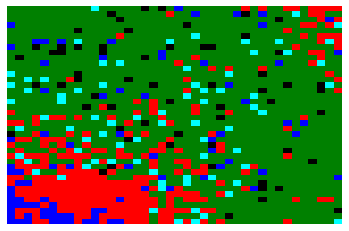

In [10]:
import jupyter_display_do_not_mark as jp
sim_example=g.main(40,2,0.2,2,0.3,0.05,0.1,0.2,"S",0.25,5,100,40)
jp.inst_anim(sim_example, 20)

<IPython.core.display.Javascript object>


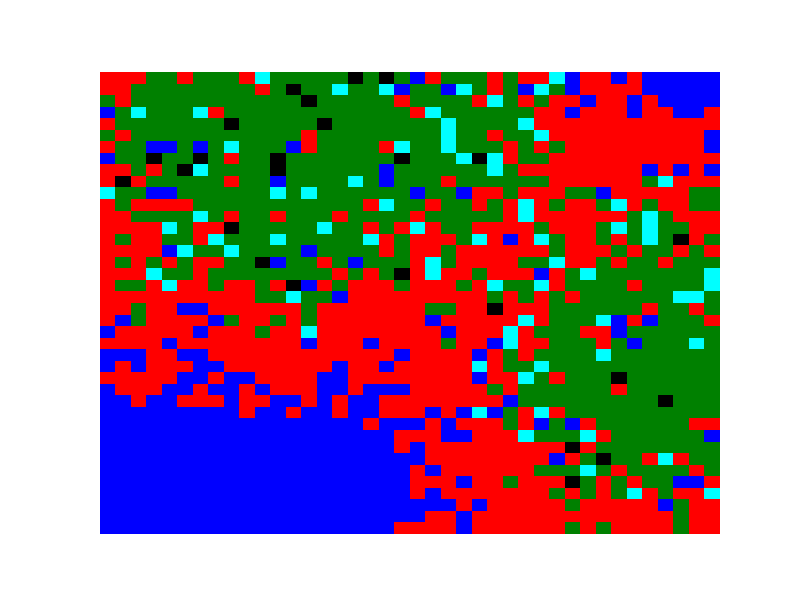

In [11]:
%matplotlib notebook
anim=animation.grid_animation(sim_example)


**-plot_show** produces a subplot which contains a table of statistics from the simulation along with a line graph which represents the simultaion. The line graph has a label of the peak infections and contains a legend to identify lines. The code is written in a way such that the peak infection label will never obscure the peak infection itself, and the legend will refrain from interfering with the lines. The function takes the list of integer grids from **main** as its argument. Using the **grid_count_list** function, we get lists of the number of people in each infection state for every day. Then the number of susceptible, infected, recovered, hospitilised and dead people are plotted against time. The function also produces a dataframe of the values of certain states on certain days and returns it as a table of statistics in a subplot next to the animation. It gives statistic updates at roughly 25%, 50%, 75% and 100% of the duration of the simulation, and gives context and a more quantative overview of the data produced in the simulation. The use of a subplot here is also important, as each plot gives the user a different perspective on the data, the simulation and results can be understood in a more comprehensive fashion.

<IPython.core.display.Javascript object>


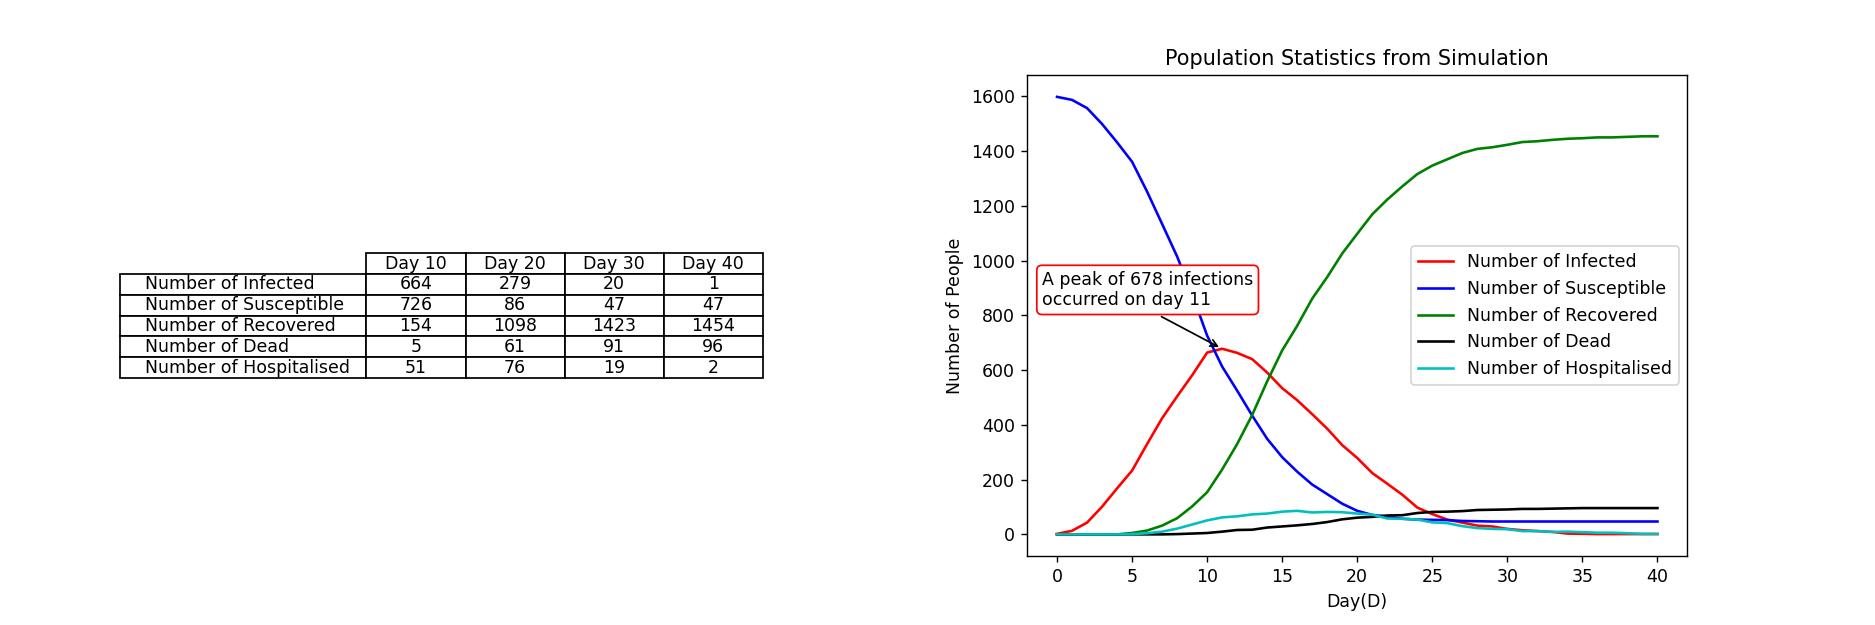

The peak number of infections was 678 and occured on day 11


<function matplotlib.pyplot.show(block=None)>

In [12]:
%matplotlib notebook 
jp.plot_show(sim_example)

## Results

The simulation we have made is designed so that it can be used to model a wide variety of different diseases, depending on the specific characteristics of said diseases. For example, if we wanted to model the **Covid-19** pandemic, we could set parameters which represent a high infection rate, but a low hospital and death rate. As such if we set: inf_rate=0.2, hosp_rate=0.1, death rate=0.05, rec_rate=0.3, then we should get a relatively accurate representation.

Hospitals were overwhelmed for a total of 7 days causing 38 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


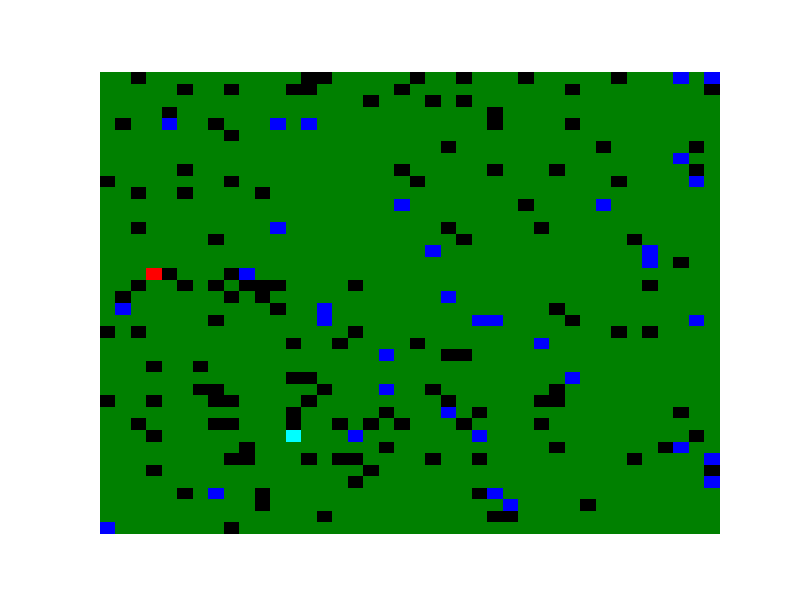

<IPython.core.display.Javascript object>


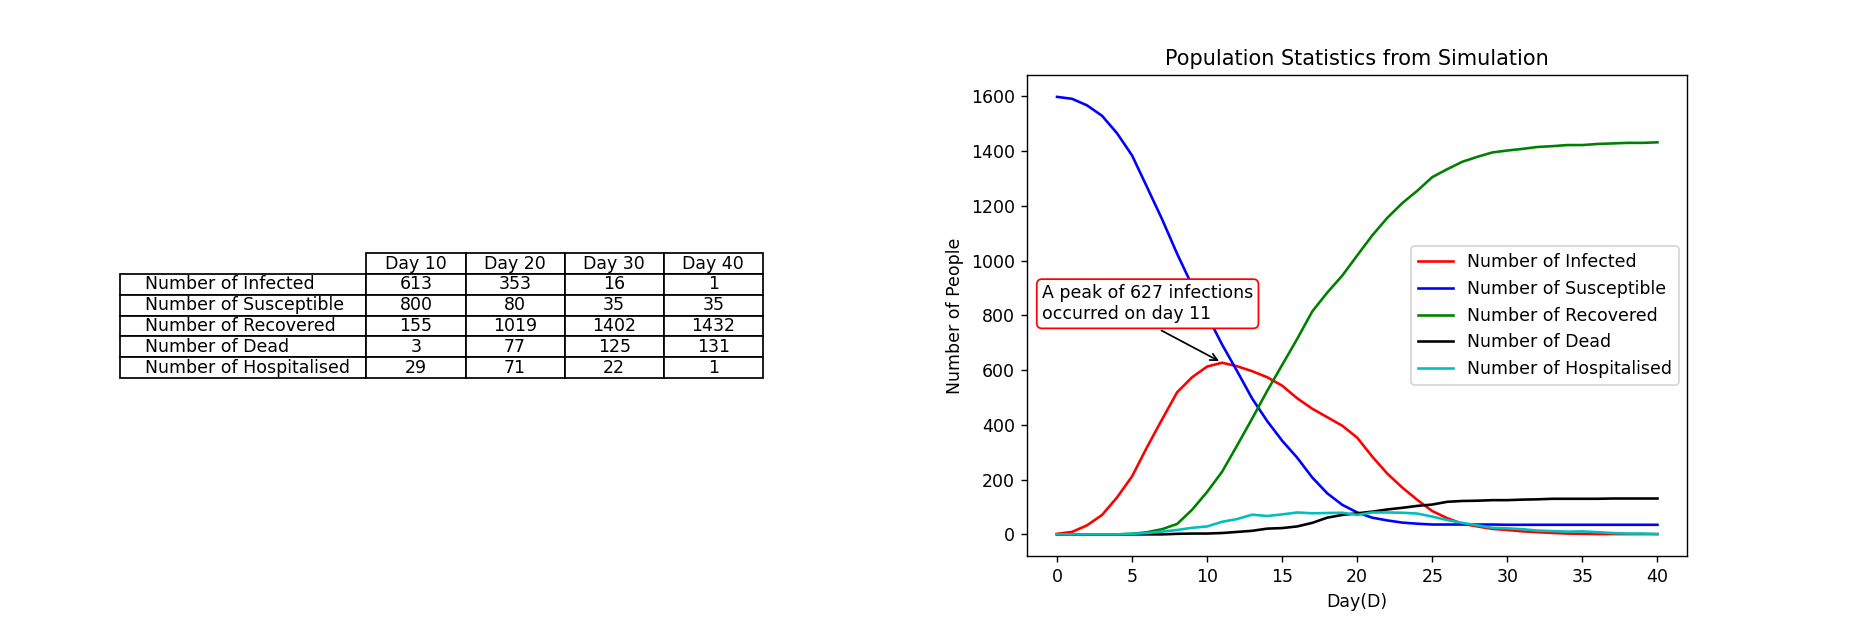

The peak number of infections was 627 and occured on day 11


<function matplotlib.pyplot.show(block=None)>

In [20]:
%matplotlib notebook
covid=g.main(40,2,0.2,2,0.3,0.05,0.1,0.05,'S',0.25,5,100,40)
anim=animation.grid_animation(covid)
jp.plot_show(covid)

The above outputs could be those for a developed country, where the hospital capacity is high. If we lower the hospital capacity (percent_hosp_capacity) and the fraction of the population which is vaccinated, we should see an increase in deaths, which could model a **less developed country** with less hospital space and less vaccines. We observe the spike in deaths when the hospitals become overwhelmed, however as people in hospital recover and space becomes available again, the death flattens out very quickly.

Hospitals were overwhelmed for a total of 18 days causing 335 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


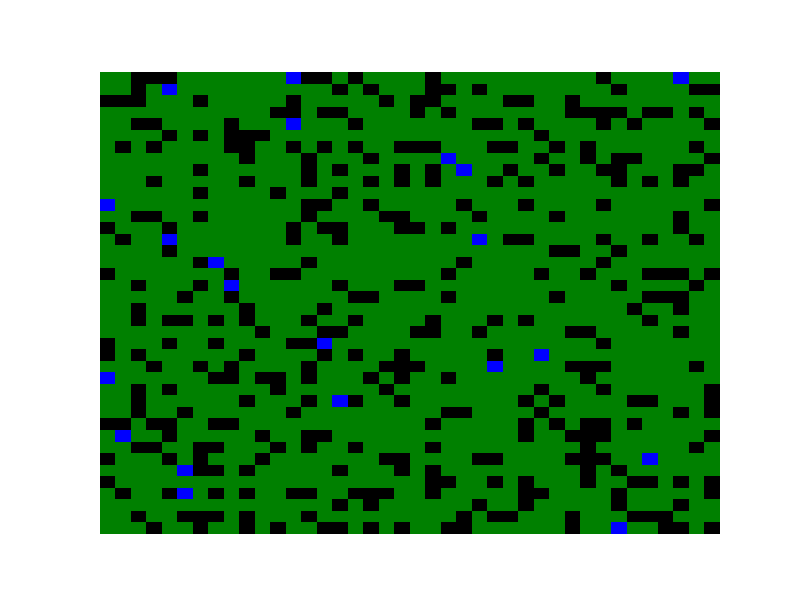

<IPython.core.display.Javascript object>


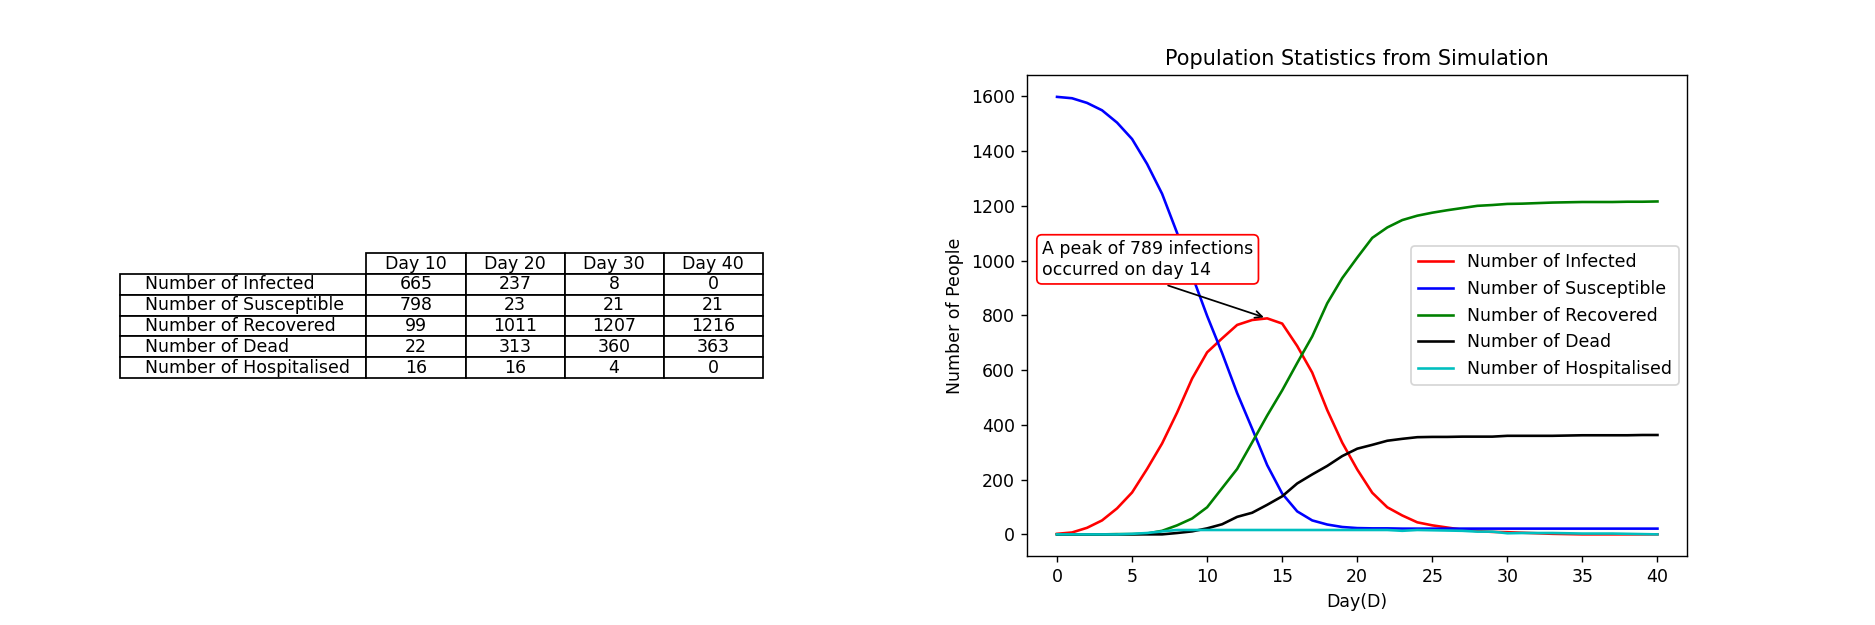

The peak number of infections was 789 and occured on day 14


<function matplotlib.pyplot.show(block=None)>

In [22]:
%matplotlib notebook
covid_undeveloped=g.main(40,2,0.2,2,0.3,0.05,0.1,0.01,'S',0.1,5,100,40)
anim=animation.grid_animation(covid_undeveloped)
jp.plot_show(covid_undeveloped)




We could also use our model to simulate the outbreak of a **less infectious**, yet **more deadly** disease, with a lower infection rate (inf_rate), but higher hospitalisation (hosp_rate) and death rates (death_rate). It results in a much smaller infection peak on the graph, but a much higher final death toll, and hospitalisation peak.

Hospitals were overwhelmed for a total of 0 days causing 0 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


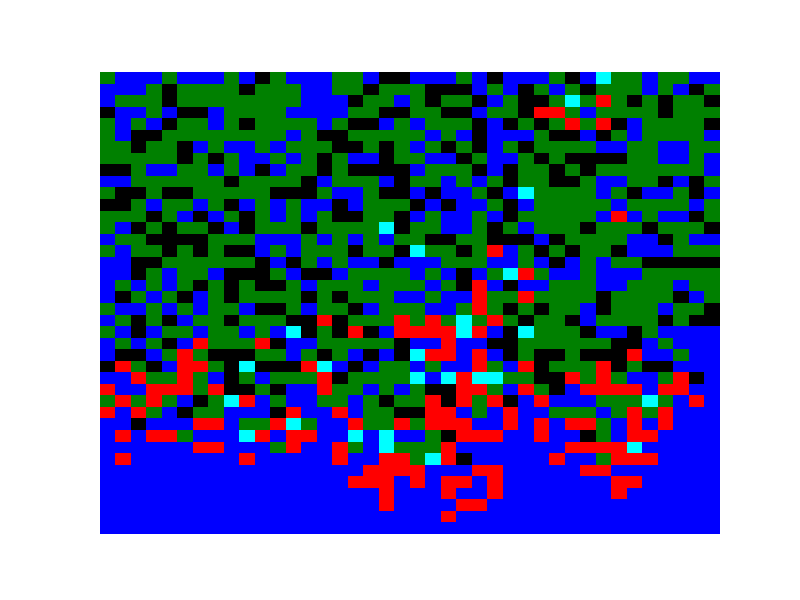

<IPython.core.display.Javascript object>


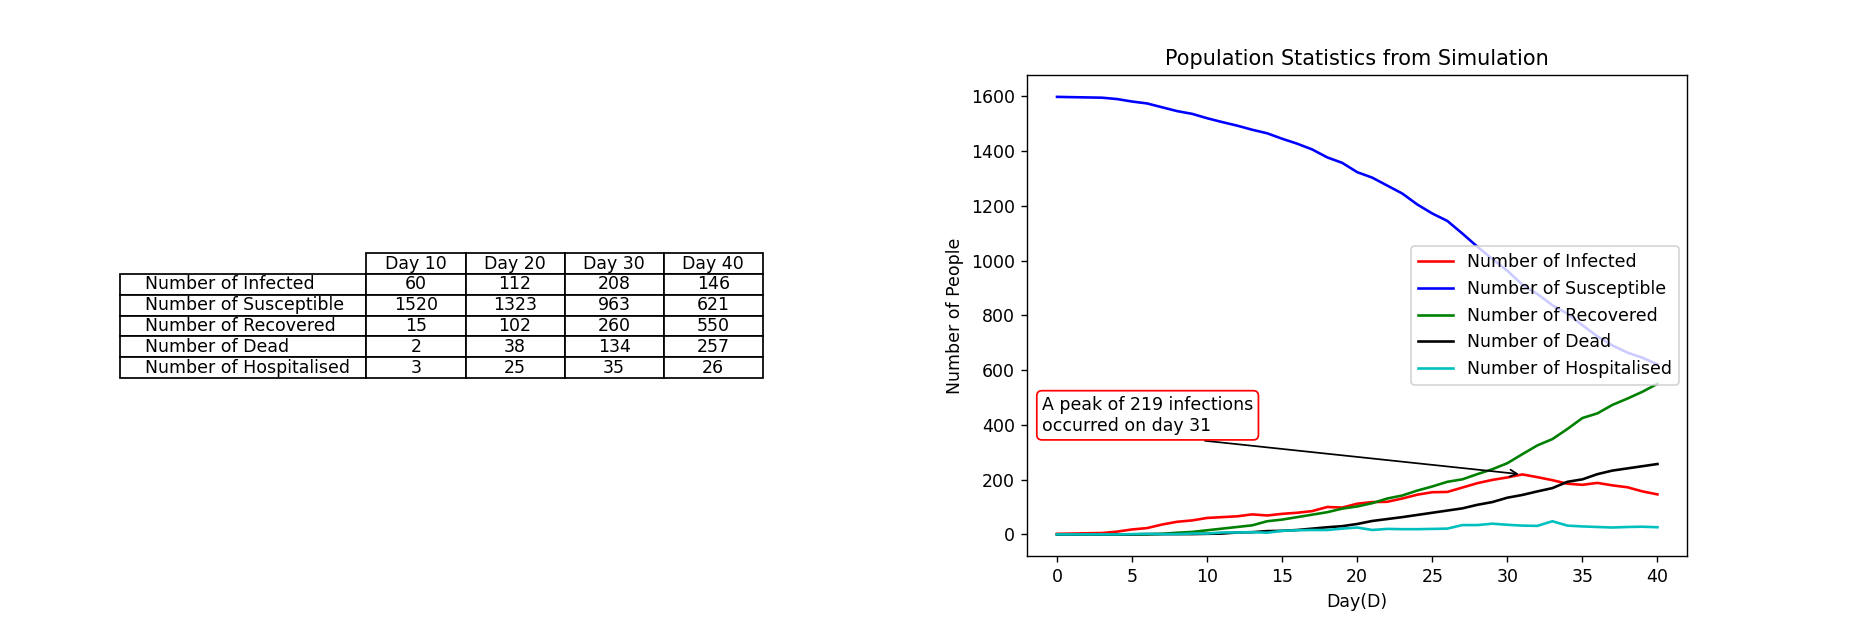

The peak number of infections was 219 and occured on day 31


<function matplotlib.pyplot.show(block=None)>

In [23]:
%matplotlib notebook
deadly_disease=g.main(40,2,0.05,2,0.3,0.3,0.3,0.05,'S',0.25,5,100,40)
anim=animation.grid_animation(deadly_disease)
jp.plot_show(deadly_disease)

Another changeable parameter is the population structure, with three options: 'S' (stationary, meaning an equal distribution of age), 'E' (expansive, meaning a larger young population), 'C' (constrictive, meaning a larger old population). The age of the person affects their likelehood of becoming infected, and also their likelehood of dying from the disease. If we run similar parameters to before, we should see visible differences in the two plots and animations. Firstly, a largely **young population** using the 'E' parameter. We observe a larger amount of recoveries, and a much smaller number of deaths.

Hospitals were overwhelmed for a total of 0 days causing 0 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


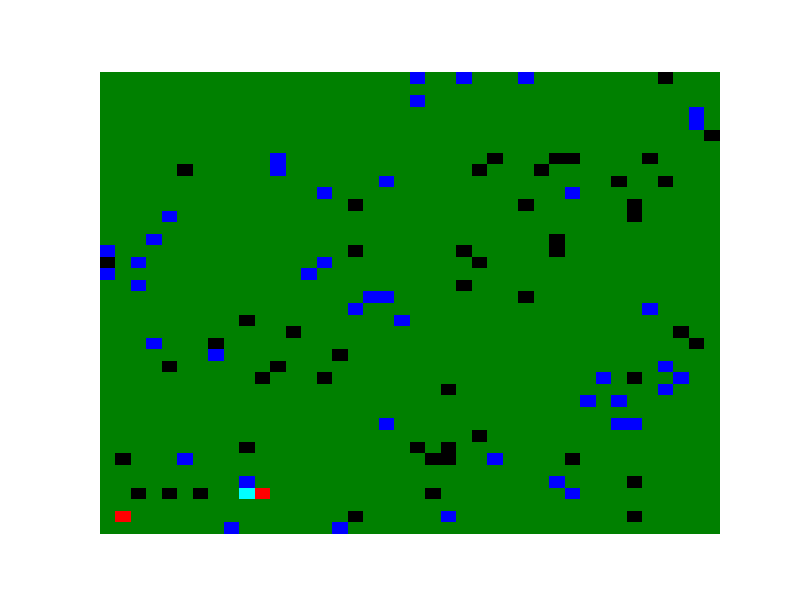

<IPython.core.display.Javascript object>


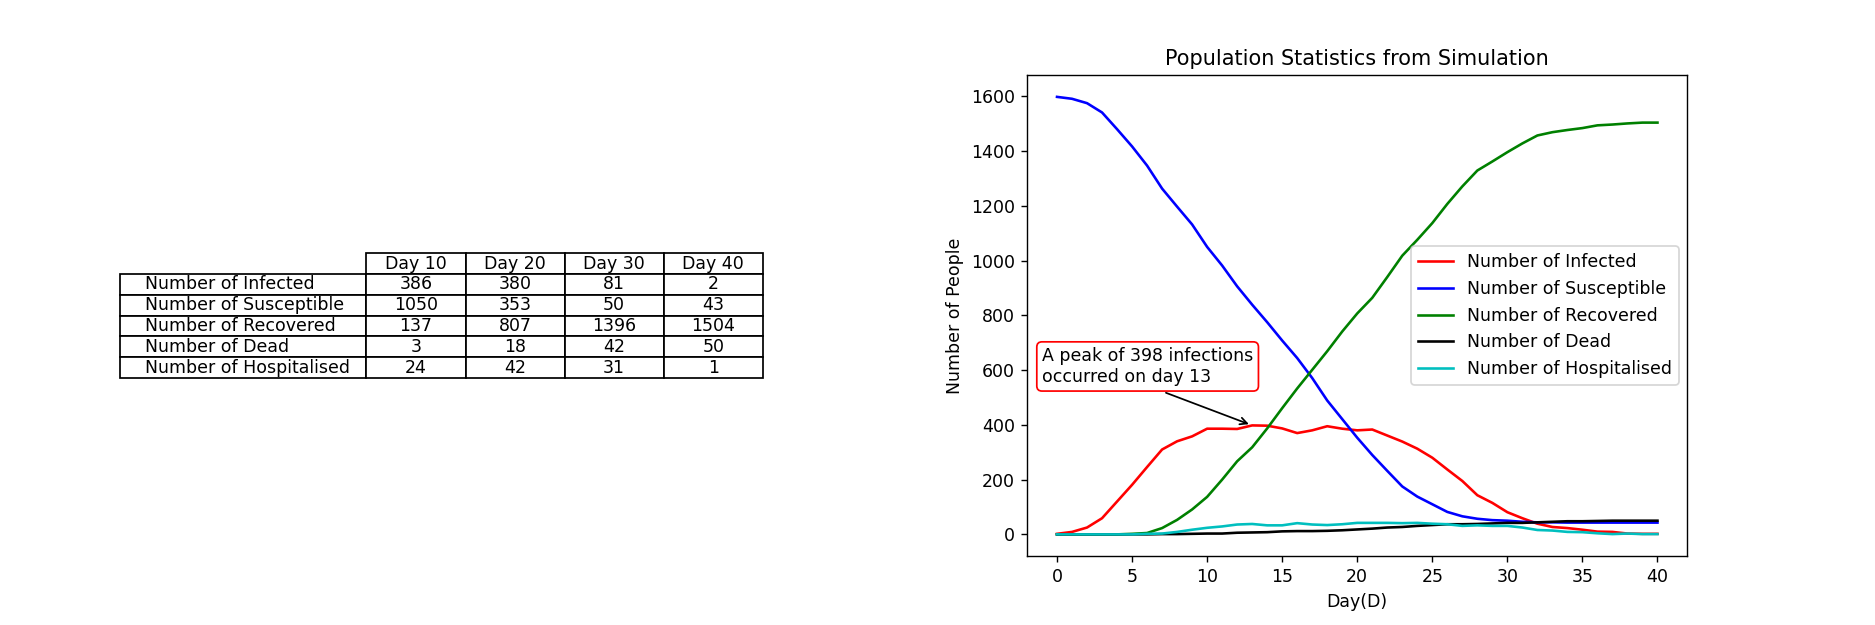

The peak number of infections was 398 and occured on day 13


<function matplotlib.pyplot.show(block=None)>

In [24]:
%matplotlib notebook
young=g.main(40,2,0.2,2,0.3,0.05,0.1,0.05,'E',0.25,5,100,40)
anim=animation.grid_animation(young)
jp.plot_show(young)



And secondly an **older population** using the parameter 'C'. We see more hospitalisations and more deaths.

Hospitals were overwhelmed for a total of 11 days causing 125 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


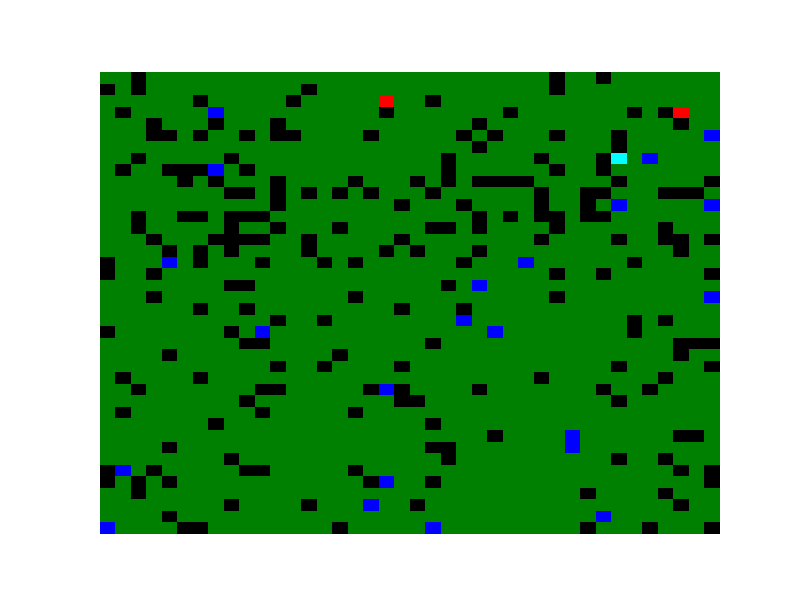

<IPython.core.display.Javascript object>


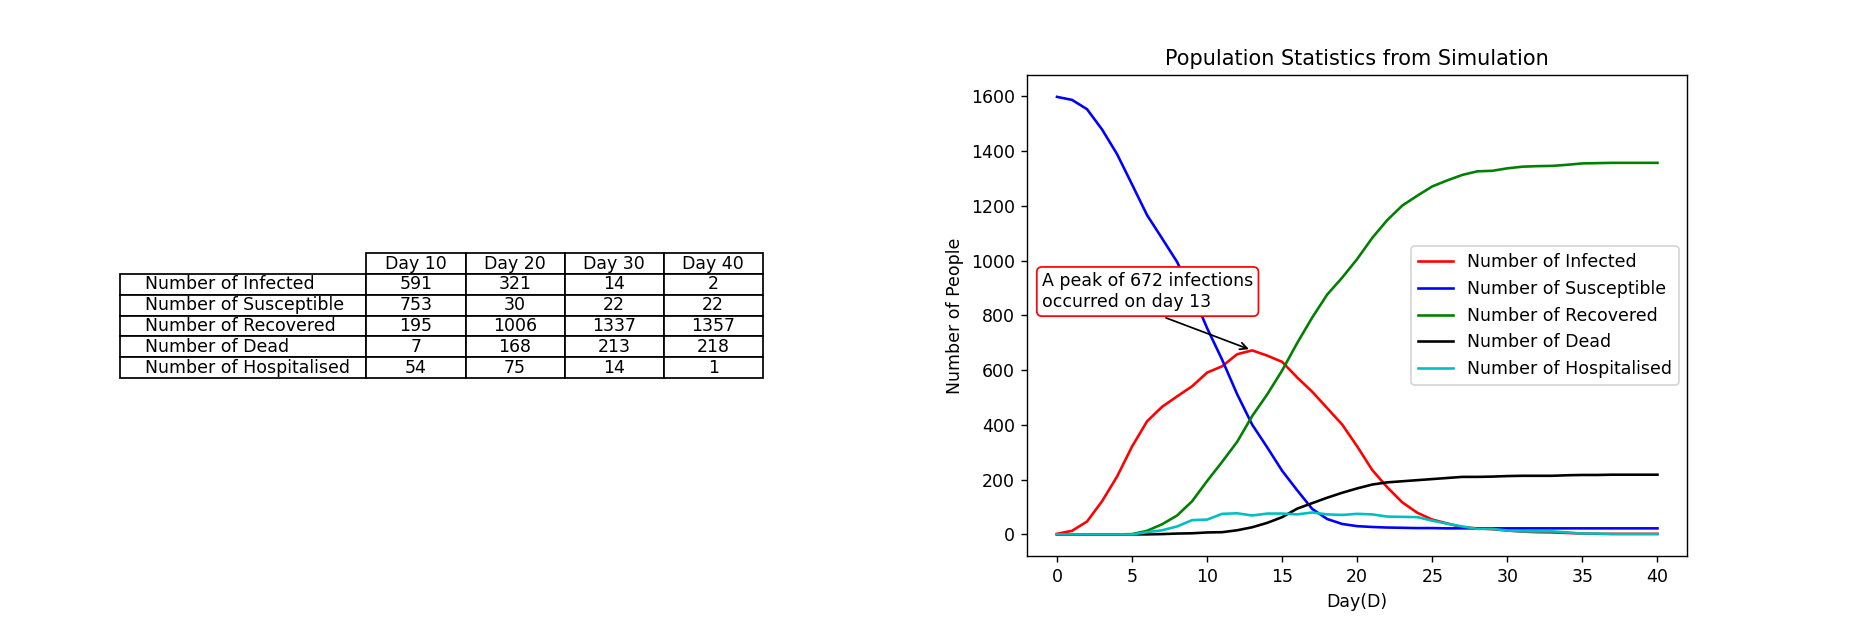

The peak number of infections was 672 and occured on day 13


<function matplotlib.pyplot.show(block=None)>

In [25]:
%matplotlib notebook
old=g.main(40,2,0.2,2,0.3,0.05,0.1,0.05,'C',0.25,5,100,40)
anim=animation.grid_animation(old)
jp.plot_show(old)

Another adjustable parameter is 'inf_start', which defines the number of people infected on day 0. A **higher number** means a much faster spread of infection, giving a higher, earlier infection peak.

Hospitals were overwhelmed for a total of 7 days causing 102 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


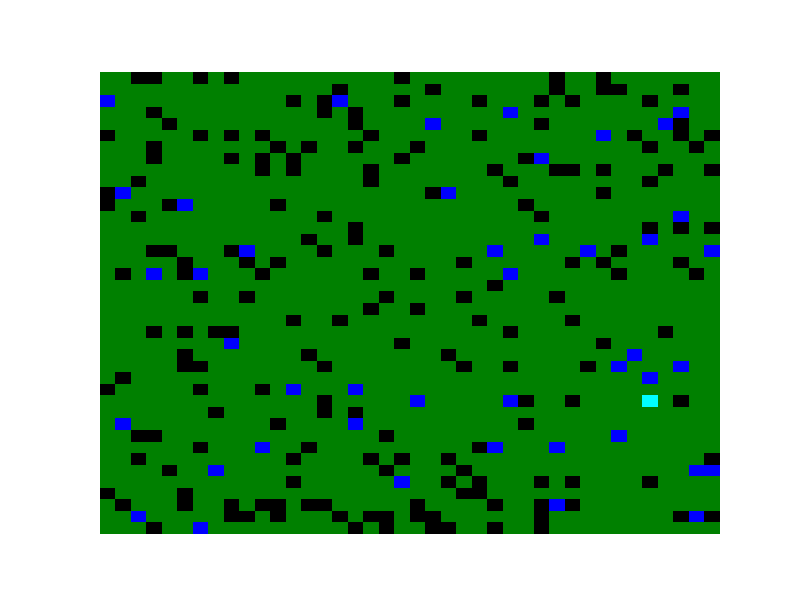

<IPython.core.display.Javascript object>


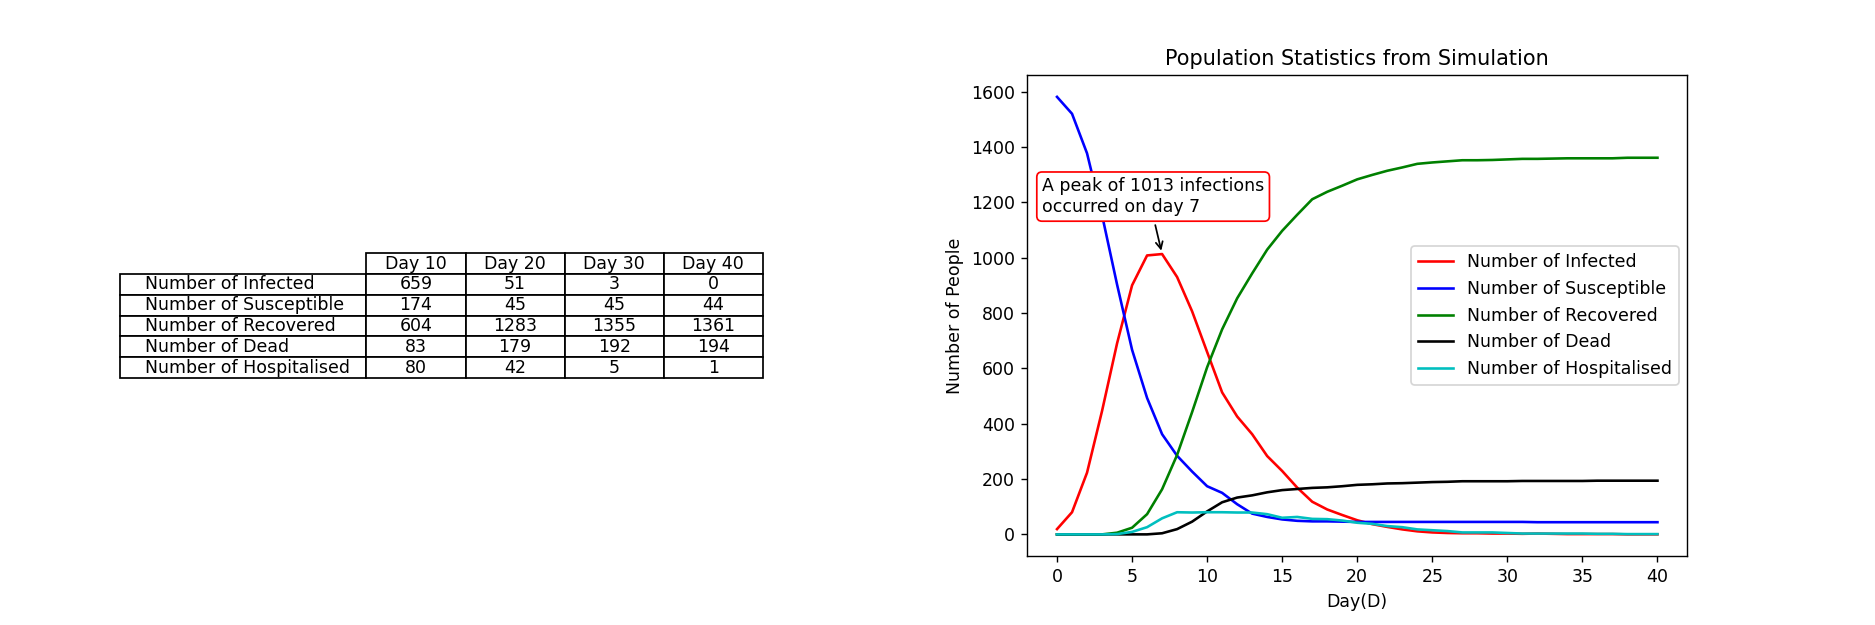

The peak number of infections was 1013 and occured on day 7


<function matplotlib.pyplot.show(block=None)>

In [26]:
%matplotlib notebook
multi_start=g.main(40,20,0.2,2,0.3,0.05,0.1,0.05,'S',0.25,5,100,40)
anim=animation.grid_animation(multi_start)
jp.plot_show(multi_start)

Changing the **immunity** creates the possibility of multiple waves of infection.

Hospitals were overwhelmed for a total of 10 days causing 83 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


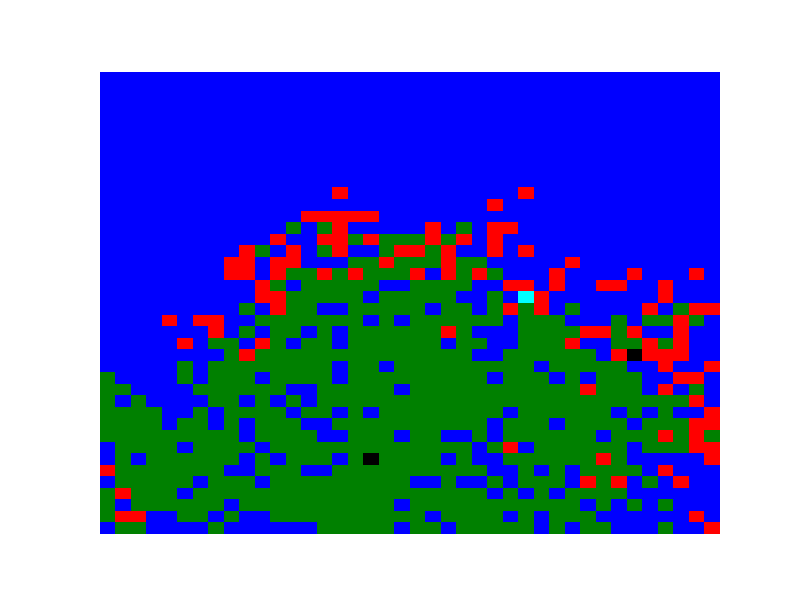

<IPython.core.display.Javascript object>


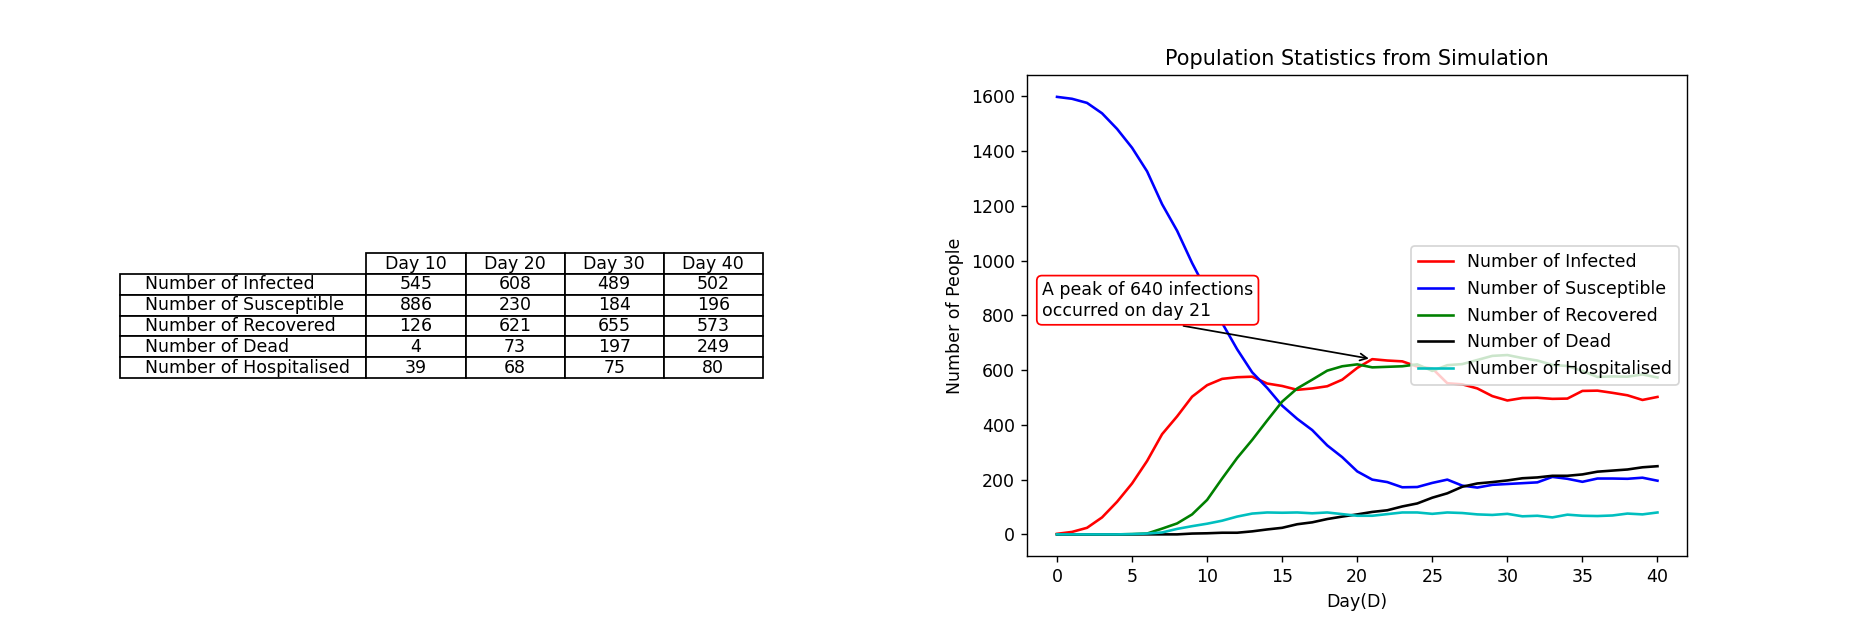

The peak number of infections was 640 and occured on day 21


<function matplotlib.pyplot.show(block=None)>

In [33]:
%matplotlib notebook
low_immunity=g.main(40,2,0.2,2,0.3,0.05,0.1,0.05,'S',0.25,5,5,40)
anim=animation.grid_animation(low_parameters)
jp.plot_show(low_immunity)

Finally, to show the true contrast that the changing of the paramters can bring to the animation and plot, we will run two simulations. Firstly, with paramater values which lead to a low rate of infection, hospitality and death, and a high rate of recovery, and secondly, with values which lead to a high rate of infection, hospitality and death, and a low rate of recovery. Below is the simulation with the paramaters which result in least devastation.

Hospitals were overwhelmed for a total of 0 days causing 0 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


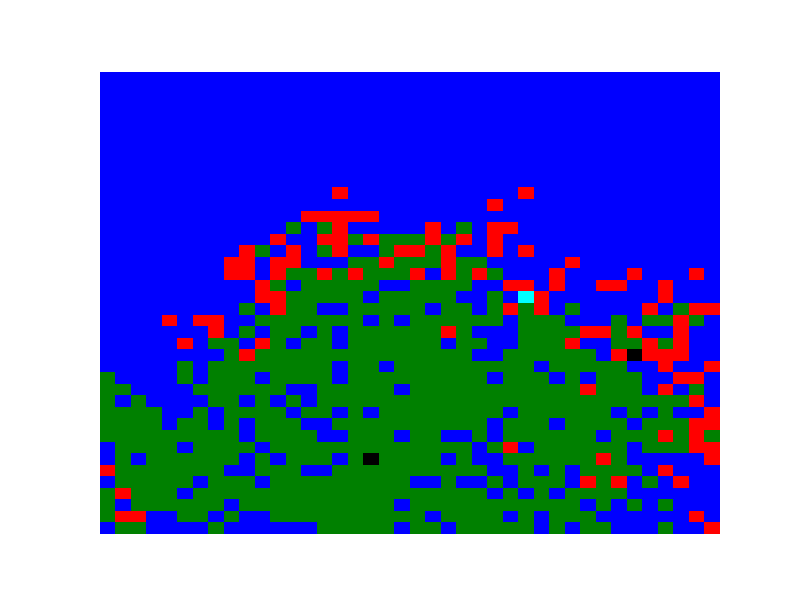

<IPython.core.display.Javascript object>


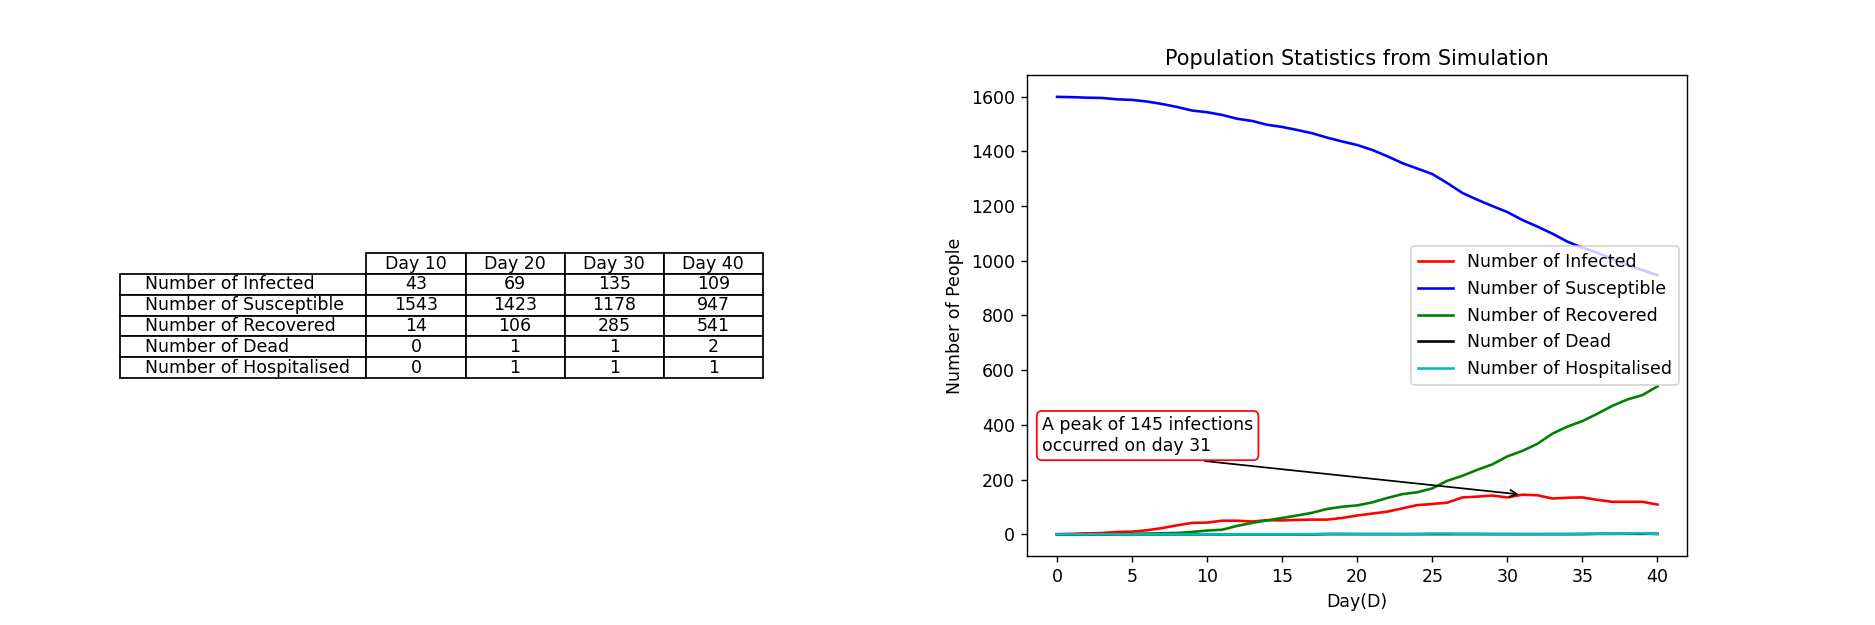

The peak number of infections was 145 and occured on day 31


<function matplotlib.pyplot.show(block=None)>

In [28]:
%matplotlib notebook
low_parameters=g.main(40,1,0.2,2,0.5,0.01,0.05,0.05,'E',1,5,100,40)
anim=animation.grid_animation(low_parameters)
jp.plot_show(low_parameters)

In [ ]:
And now parameters which display a far more impactful outbreak.

Hospitals were overwhelmed for a total of 11 days causing 800 people to die because of lack of hospitalisation


<IPython.core.display.Javascript object>


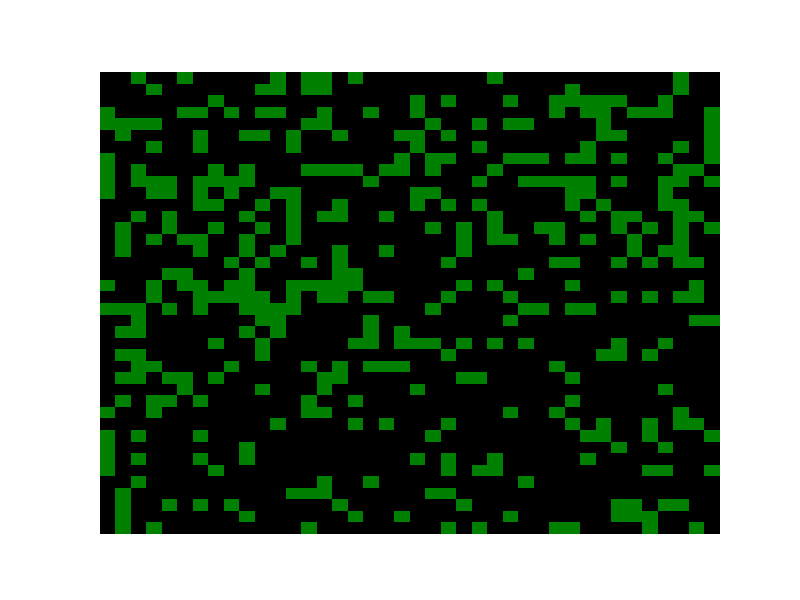

<IPython.core.display.Javascript object>


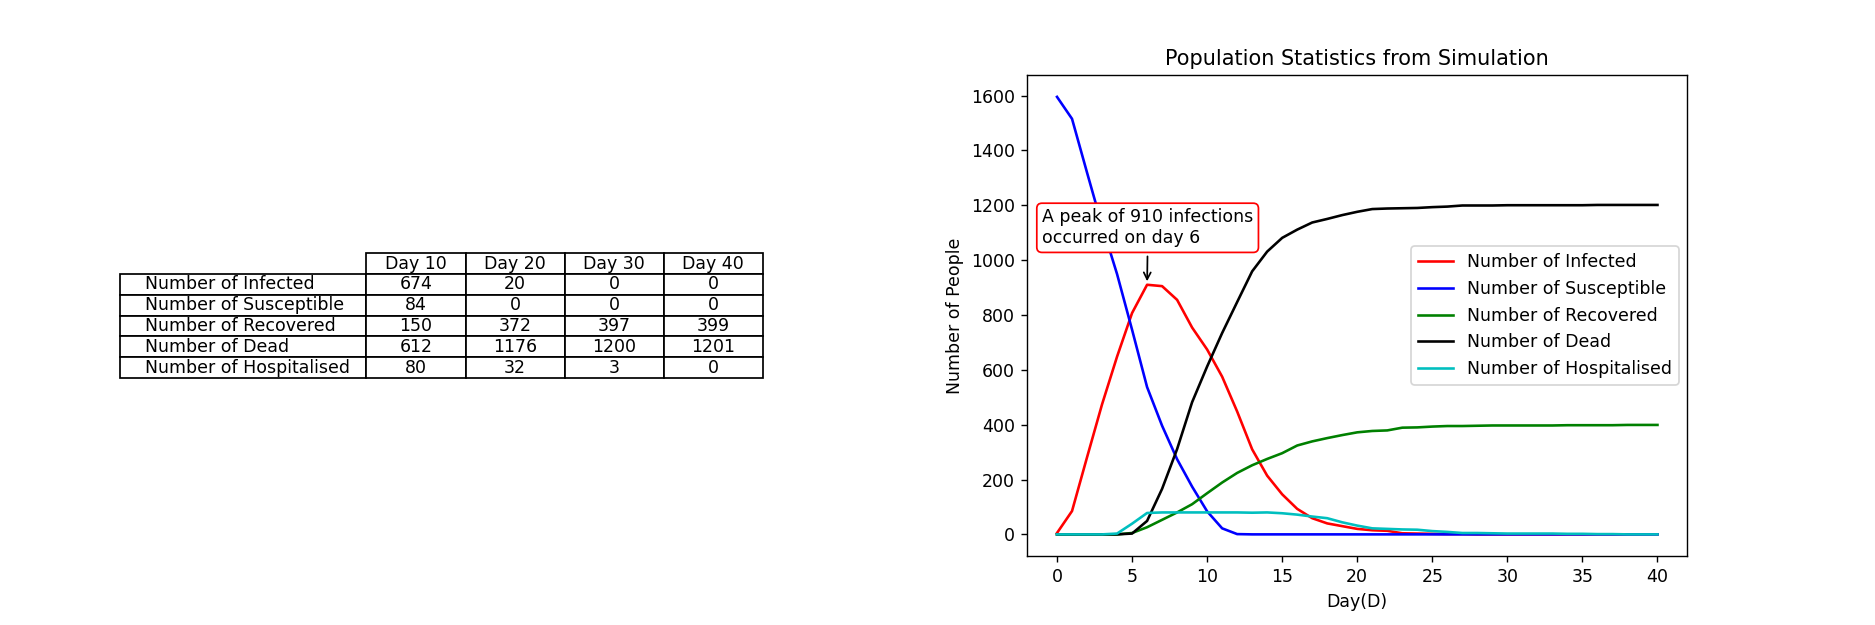

The peak number of infections was 910 and occured on day 6


<function matplotlib.pyplot.show(block=None)>

In [30]:
%matplotlib notebook
high_parameters=g.main(40,5,0.6,2,0.1,0.3,0.3,0.05,'C',0,5,100,40)
anim=animation.grid_animation(high_parameters)
jp.plot_show(high_parameters)